# Data structures accepted by seaborn

    作为数据可视化库，seaborn要求为其提供数据。本章介绍完成该任务的各种方法。Seaborn支持几种不同的数据集格式，大多数函数接受由来自pandas或numpy库的对象以及内置Python类型（如列表和字典）表示的数据。了解与这些不同选项关联的使用模式将有助于快速为几乎任何数据集创建有用的可视化效果。

    注意：
    在当前版本（v0.11.0），此处介绍的全部选项仅由 seaborn 中的模块子集（即relational和distribution modules）支持。其他模块提供了许多相同的灵活性，但有一些例外（例如，catplot（） 和 lmplot（） 仅限于long-form data with named variables）。数据引入代码将在接下来的版本中将实现标准化，但在此之前，如果每个函数未按预期对数据集执行预期操作，请注意每个函数的特定文档。

## Long-form vs. wide-form data

    seaborn中的大多数绘图函数都面向vector数据。将 x 与 y 绘制时，每个变量都应该是一个vector。Seaborn 接受表格式的data sets。“long-form”和“wide-form”数据表之间存在根本区别，seaborn将以不同的方式对待这2种类型的数据表。

### Long-form data

    长格式数据表具有以下特征：
    ·每个变量都是一列
    ·每个观测值都是一行

    举个简单的例子，考虑“航班”数据集，该数据集记录了从1949年到1960年每个月飞行的航空公司乘客人数。此数据集有三个变量（年、月和乘客人数）：

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('seaborn-ticks')
%matplotlib inline

In [2]:
# long-form data相当于重复测量数据的长格式形式
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


    对于long-form数据，表中的列通过显式分配给其中一个变量，在绘图中为列指定角色。例如，绘制每年乘客数量的月度图如下所示：

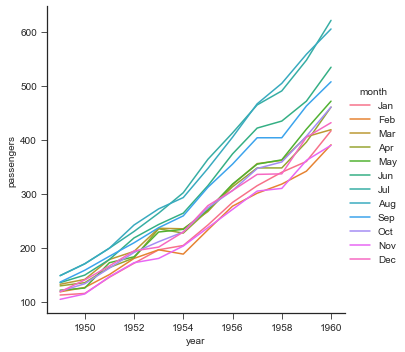

In [10]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

    long-form数据的优点是，它非常适合这种图形的显式规范。它可以容纳任意复杂性的数据集，只要变量和观测值可以明确定义即可。但是这种格式需要一些时间来适应，因为它通常不是人们头脑中的数据模型。

### Wide-form data

    对于简单的数据集，wide-form数据格式通常更直观地，其中列和行包含不同变量的级别。例如，我们可以通过“透视”将航班数据集转换为wide-form数据的格式，这样每一列都是一个时间序列的特定月份：

In [4]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


    转换成wide-form数据后，我们得到相同的三个变量，但它们的组织方式不同。此数据集中的变量链接到表的维度，而不是命名字段。每个观测值由表中单元格的值以及该单元格相对于行和列索引的坐标定义。
    
    使用long-form数据，可以按照变量名称访问数据集中的变量。wide-form数据的情况并非如此。尽管如此，由于表的维度与数据集中的变量之间存在明显的关联，因此seaborn能正确的将变量绘制出来。

    注意：
    当既不分配 x 也不分配 y 时，只将数据传递给data参数时，Seaborn 将data参数传入的数据视为wide-form数据。

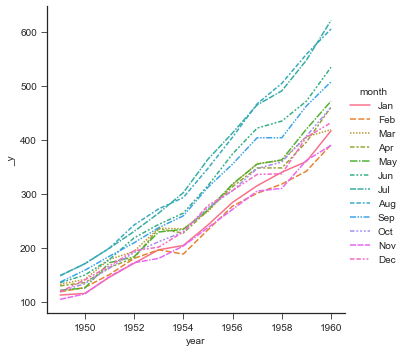

In [14]:
sns.relplot(data=flights_wide, kind = 'line')

    这里绘制的图和之前绘制的图非常相似。Seaborn 将 dataframe 的 index 分配给 x，将 dataframe 的值分配给 y，并为每个月绘制了一条单独的线。
    然而，这两个图之间存在显着差异。
    当数据集通过“pivot”操作将其从长格式转换为宽格式时，有关值含义的信息丢失了。
    结果，没有y轴标签。 这里的线条是用虚线，因为 relplot() 已将列变量自动映射到hue和style上，以便绘图更易于访问。
    在long-form数据的情况下我们没有这样做，但我们可以通过设置style='month'，使线条和wide-form数据的图一样。
    但是由于wide-form数据的style和hue是自动映射的，用户并不能进行更改，否则会报错。

    到目前为止，我们在使用wide-form数据时输入的内容要少得多，并且绘制的图几乎相同。但是long-form数据的一大优势是，一旦你拥有正确格式的数据，你就不再需要考虑它的结构了。可以通过仅考虑其中包含的变量来设计你的图。例如，要绘制表示每年每月时间序列的线，只需重新分配变量：

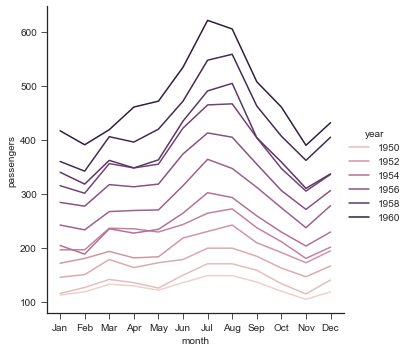

In [15]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

    要使用wide-form数据实现相同的重新映射，我们需要转置表：

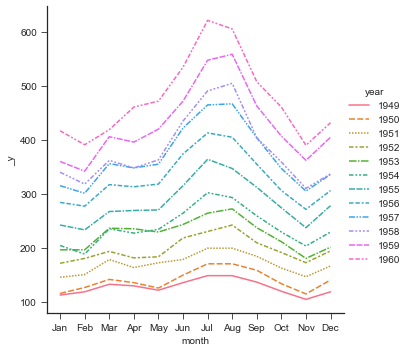

In [16]:
sns.relplot(data=flights_wide.transpose(), kind="line")

    （此示例还说明了另一个问题，即 seaborn 当前将wide-form数据集中的列变量视为分类变量，而不管其数据类型如何，而由于long-form数据集变量是数字，因此为其分配了定量hue和legend。这可能会在将来改变）。

    缺少显式变量赋值还意味着每个绘图类型都需要在宽格式数据的dimensions和绘图中的roles之间定义固定映射。由于自然映射可能因绘图类型而异，因此在绘制wide-formed数据时，结果的可预测性较低。
    例如，分类图将表的列维度分配给 x，然后跨行聚合（忽略索引year）：

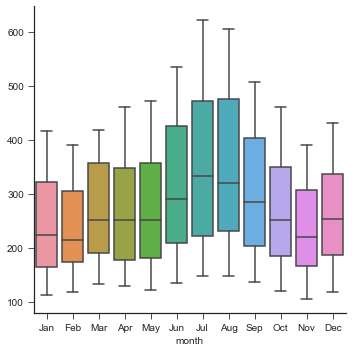

In [17]:
sns.catplot(data=flights_wide, kind="box")

    根据Python之禅：显式由于隐式，所以应该尽可能使用long-form data进行绘图

    使用 pandas 表示宽格式数据时，只能使用几个变量（不超过三个）。这是因为 seaborn 不使用多索引信息（这就是 pandas 以表格格式表示附加变量的方式）。 
    
    xarray 项目提供了标记的 N 维数组对象，可以将其视为将wide-form数据推广到更高维度。目前，seaborn 不直接支持来自 xarray 的对象，但可以使用 to_pandas 方法将它们转换为long-form的pandas.DataFrame对象，然后像任何其他长格式数据集一样在 seaborn 中绘制。

### Messy data

    许多数据集无法使用long-form或wide-form规则进行清晰解释。
    如果数据是明显的long-form或wide-form的数据集，称数据为'tidy'，而对于不能区分的数据集，称为'messy'。
    在混乱的数据集中，变量既不是由唯一的键定义的，也不是由表的维度定义的。
    这通常发生在重复测量的数据中，每行对应于数据收集的单位。
    考虑一下这个来自心理学实验的简单数据集，其中二十名受试者执行了一项记忆任务，他们在注意力分散或集中时研究字谜：

In [18]:
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


    注意力变量是被试者之间的，但也有一个被试者内的变量：谜题的序号。相关测量是记忆性能的分数。这两个变量（谜题的序号和谜题的分数）在多个列中联合编码。结果，整个数据集既不是明显的长格式，也不是明显的宽格式。

    我们如何告诉 seaborn 将平均分数绘制为注意力和谜题序号的函数？
    我们首先需要将数据强制转换为我们的两个结构之一。
    让我们将其转换为一个整洁的长表，这样每个变量都是一列，每一行是一个观察值。
    我们可以使用 pandas.DataFrame.melt() 方法来完成这个任务：

In [19]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


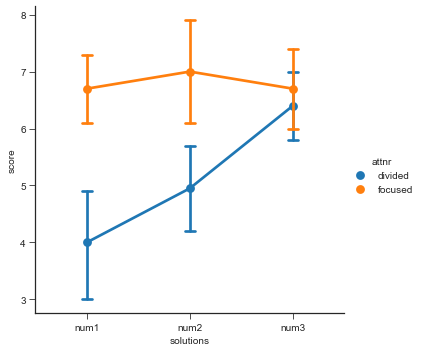

In [26]:
kwargs = dict(capsize=0.1)

sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point",**kwargs)

### Further reading and take-home points

    long-form数据集具有明显的优势。它允许通过将数据集中的变量显式分配给绘图中的角色来创建图形，并且您可以使用三个以上的变量来执行此操作。如果可能，在开始认真分析时，请尝试使用long-formed结构表示数据。seaborn文档中的大多数示例都将使用长格式数据。

## Options for visualizing long-form data

    虽然long-form数据有一个精确的定义，但 seaborn 在如何跨内存中的数据结构实际组织方面相当灵活。
    文档其余部分中的示例通常会使用 pandas.DataFrame 对象并通过将其列的名称分配给图中的变量来引用其中的变量。
    但也可以将向量存储在 Python 字典或类实现该接口。

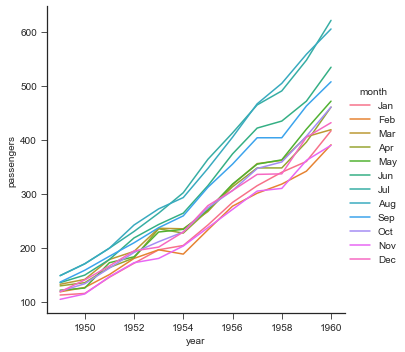

In [27]:
# 将DataFrame转换成字典格式
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

    许多 pandas 操作（如分组依据的拆分-应用-合并操作）将生成一个dataframe，其中信息已从输入的dataframe的column转移到输出的index。只要保留了名称，仍然可以正常引用数据。

In [29]:
flights_avg = flights.groupby("year").mean()
flights_avg

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


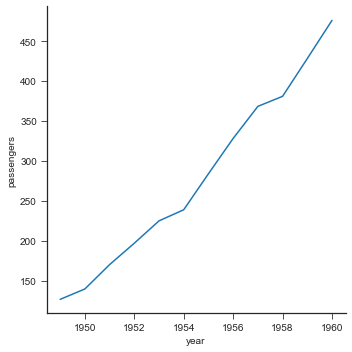

In [35]:
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line")

    此外，可以将数据vector直接作为参数传递给 x、y 和其他绘图参数。如果这些向量是 pandas 对象，则 name 属性将成为绘图的label。

In [36]:
year = flights_avg.index
passengers = flights_avg["passengers"]
year,passengers

(Int64Index([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
             1960],
            dtype='int64', name='year'),
 year
 1949    126.666667
 1950    139.666667
 1951    170.166667
 1952    197.000000
 1953    225.000000
 1954    238.916667
 1955    284.000000
 1956    328.250000
 1957    368.416667
 1958    381.000000
 1959    428.333333
 1960    476.166667
 Name: passengers, dtype: float64)

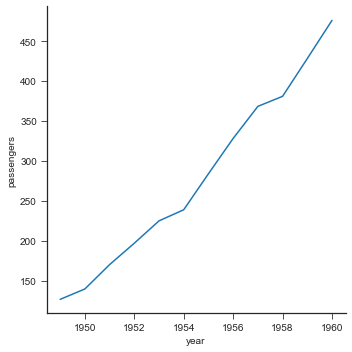

In [37]:
sns.relplot(x=year, y=passengers, kind="line")

    实现 Python 序列接口的 Numpy 数组和其他对象也可以工作，但如果它们没有名称，则如果不指定，则不会绘制其名称。

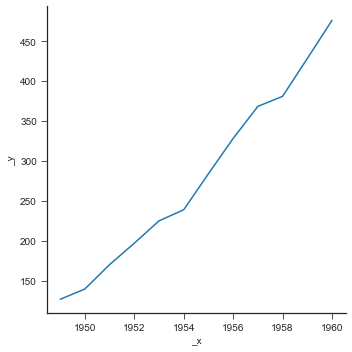

In [38]:
year_numpy = year.to_numpy()
passengers_list = passengers.to_list()

sns.relplot(x=year_numpy, y=passengers_list, kind="line")

## Options for visualizing wide-form data

    用于传递wide-form数据的选项更加灵活。但从本质上讲，如果数据可以被视为vector或vector的集合吗，可以传递给data，并且通常可以构造有效的图。

    之前的示例的wide-form的Pandas.DataFrame对象，可以将其视为其列的集合。dict或list的Pandas对象同样可以正常运行，但是会修饰axis label。

In [40]:
flights_wide_list = [col for _, col in flights_wide.items()]
flights_wide_list[0]

year
1949    112
1950    115
1951    145
1952    171
1953    196
1954    204
1955    242
1956    284
1957    315
1958    340
1959    360
1960    417
Name: Jan, dtype: int64

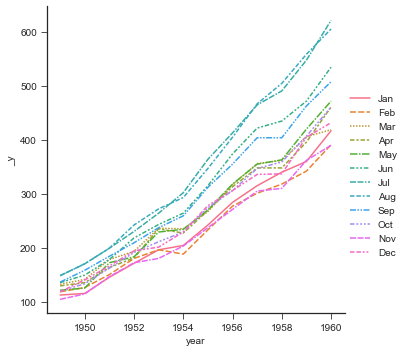

In [41]:
sns.relplot(data=flights_wide_list, kind="line")

    vector的集合不需要有相同的长度。如果他们有index，将用于对齐。

In [44]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
type(two_series[0])

pandas.core.series.Series

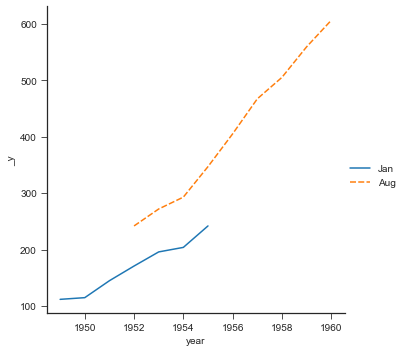

In [45]:
sns.relplot(data=two_series, kind="line")

    而序号索引将用于 numpy 数组或简单的 Python 序列（从0开始）

In [46]:
two_arrays = [s.to_numpy() for s in two_series]
two_arrays[0]

array([112, 115, 145, 171, 196, 204, 242])

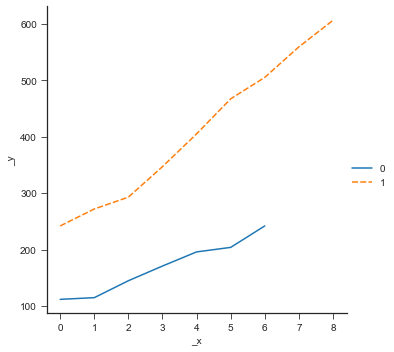

In [47]:
sns.relplot(data=two_arrays, kind="line")

    注意上图：2个vector的序列引索都是从0开始的，所以得到的2条线是从x=0开始，即在转换为array的过程中，丢失了Pandas的index信息。所以axes和legend的信息都丢失了。

    但是，这些vector的dict至少会使用key的信息（作为legend）。

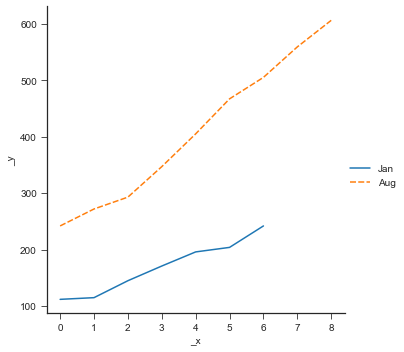

In [48]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

    矩形 numpy 数组被视为没有index信息的DataFrame，因此它们被视为多个列vector的集合。
    请注意，这与 numpy 索引操作的工作方式不同，其中单个索引将访问一行。但这与 pandas 将array转换为DataFrame或 matplotlib 绘制数据是一致的。
    简单的说，就是matplotlib看numpy的数据是一列列看的，而不是一行行看。

In [50]:
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [52]:
flights_array = flights_wide.to_numpy()
flights_array

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
       [115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140],
       [145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166],
       [171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194],
       [196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201],
       [204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229],
       [242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278],
       [284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306],
       [315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336],
       [340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337],
       [360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405],
       [417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]])

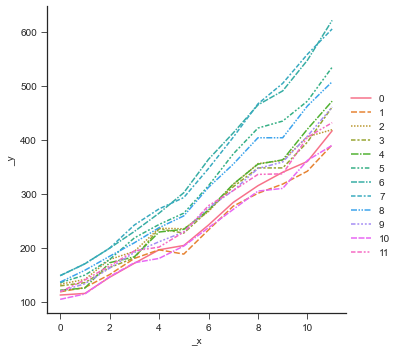

In [53]:
sns.relplot(data=flights_array, kind="line")